In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import struct

# Function to load MNIST images
def load_mnist_images(file_path):
    with open(file_path, 'rb') as file:
        # Read metadata
        magic, num_images, rows, cols = struct.unpack('>IIII', file.read(16))
        # Read the image data
        images = np.frombuffer(file.read(), dtype=np.uint8).reshape(num_images, rows, cols)
        return images

# Function to load MNIST labels
def load_mnist_labels(file_path):
    with open(file_path, 'rb') as file:
        # Read metadata
        magic, num_labels = struct.unpack('>II', file.read(8))
        # Read the label data
        labels = np.frombuffer(file.read(), dtype=np.uint8)
        return labels

base_path = '/Users/prtimilsina/Learning_data_science/takeo_data_analytics/mnist_dataset'

train_images_path = os.path.join(base_path, 'train-images.idx3-ubyte')
train_labels_path = os.path.join(base_path, 'train-labels.idx1-ubyte')
test_images_path = os.path.join(base_path, 't10k-images.idx3-ubyte')
test_labels_path = os.path.join(base_path, 't10k-labels.idx1-ubyte')


# Load the dataset
X_train = load_mnist_images(train_images_path)
y_train = load_mnist_labels(train_labels_path)
X_test = load_mnist_images(test_images_path)
y_test = load_mnist_labels(test_labels_path)

# Normalize the images
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape to 28x28x1 for CNN input
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Output dataset shapes
X_train.shape, y_train.shape, X_test.shape, y_test.shape



((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [2]:
import os
base_path = '/Users/prtimilsina/Learning_data_science/takeo_data_analytics/mnist_dataset'
print(os.listdir(base_path))

['t10k-images-idx3-ubyte', 'train-labels.idx1-ubyte', 'train-images.idx3-ubyte', 't10k-labels-idx1-ubyte', 'train-images-idx3-ubyte', 't10k-labels.idx1-ubyte', 't10k-images.idx3-ubyte', 'train-labels-idx1-ubyte']


## Running CNN

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    # Convolutional layer 1
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    # Convolutional layer 2
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the feature maps into a 1D vector
    Flatten(),

    # Fully connected dense layers
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout for regularization
    Dense(64, activation='relu'),

    # Output layer with softmax activation (10 classes)
    Dense(10, activation='softmax')
])

# Display the model architecture
model.summary()


/opt/anaconda3/envs/py_econ/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

## Compiling the Model

In [5]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


## Training the model

In [6]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,  # Number of iterations over the dataset
    batch_size=64,  # Number of samples per gradient update
    verbose=1  # Display training progress
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 32ms/step - accuracy: 0.8143 - loss: 0.5677 - val_accuracy: 0.9826 - val_loss: 0.0544
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9716 - loss: 0.0960 - val_accuracy: 0.9879 - val_loss: 0.0389
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - accuracy: 0.9798 - loss: 0.0698 - val_accuracy: 0.9888 - val_loss: 0.0334
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - accuracy: 0.9844 - loss: 0.0549 - val_accuracy: 0.9891 - val_loss: 0.0347
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 37ms/step - accuracy: 0.9864 - loss: 0.0443 - val_accuracy: 0.9906 - val_loss: 0.0325
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 47ms/step - accuracy: 0.9885 - loss: 0.0382 - val_accuracy: 0.9920 - val_loss: 0.0238
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 65s 69ms/step - accuracy: 0.9891 - loss: 0.0353 - val_accuracy: 0.9916 - val_loss: 0.0264
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 52ms/step - accuracy: 0.9906 - loss: 0.0307 - 

## Evaluating the model

In [9]:
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 99.26%


## Analyzing the results

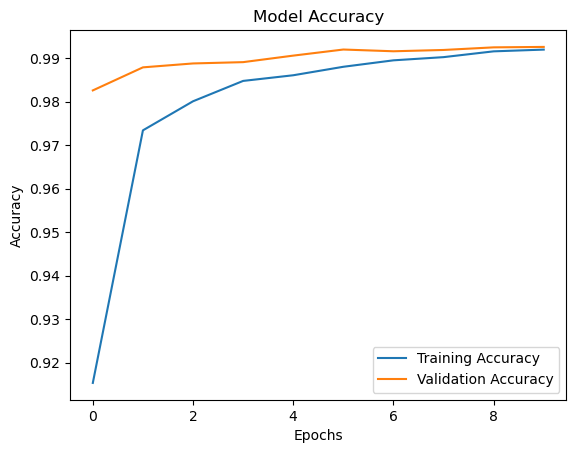

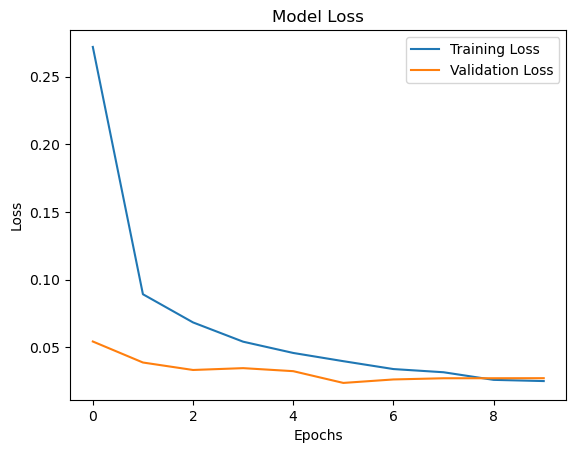

In [8]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Confusion matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


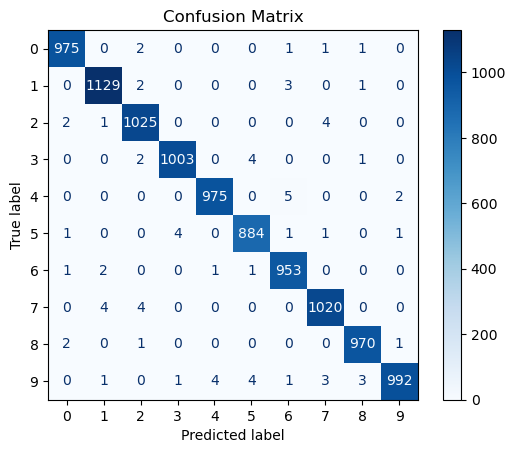

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict the test set labels
y_pred = np.argmax(model.predict(X_test), axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


## Saving the model

In [11]:
# Saving the trained model
model.save('mnist_cnn_model.h5')
print("Model saved as 'mnist_cnn_model.h5'")


Model saved as 'mnist_cnn_model.h5'


## Project Results and Inference

### Model Performance
Test Accuracy: 99.26%
The model demonstrates excellent performance, achieving over 99% accuracy on the test set. 
This indicates that the Convolutional Neural Network (CNN) successfully learned to classify handwritten digits
with minimal error.

## Confusion Matrix Insights

The confusion matrix reveals:
Strong diagonal dominance: Most predictions align with true labels, indicating high classification accuracy.
    

### Minimal misclassifications:
For example:
Digit 5: The model confused it slightly more with other digits (e.g., 4 and 3). This could be due to the structural similarity of certain handwritten digits.
Digit 9: Some misclassifications as 4.

## Strengths of the Model
### High Accuracy: 
The model is highly accurate in identifying handwritten digits.
    Low Misclassification Rate: The errors are negligible compared to the dataset size (10,000 test samples).
### Generalization: 
Performance on unseen test data reflects the model's ability to generalize effectively.

### Possible Improvements
#### Data Augmentation:
Introduce rotation, zoom, or shearing to simulate more diverse handwriting styles and improve generalization further.
#### Model Optimization:
We could experiment  with hyperparameter tuning for:
1. Learning rate adjustment.
2. Filter sizes in convolutional layers.


## Project Conclusion
The CNN model successfully classifies handwritten digits with a test accuracy of 99.26%. This showcases the power of deep learning in image classification tasks. With additional optimizations, the model could potentially reach even higher levels of performance. The project highlights the effectiveness of convolutional neural networks in extracting and learning spatial features from image data.